# Setup

## Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Math
from sympy import latex, symbols, diff
import numpy as np
pd.set_option('display.precision', 2)
np.set_printoptions(precision=2)
random.seed(1738)

## Functions

In [2]:
def round_values(numbers, precision):
    """
    Rounds a list of numbers to a given precision.

    Parameters:
    numbers (list of float): The list of numbers to round.
    precision (int): The number of decimal places to round each number to.

    Returns:
    list of float: The list of rounded numbers.
    """
    return [round(num, precision) for num in numbers]

# Population Proportion

## One Proportion

### Estimating Population Proportion

A sample of 659 parents with a toddler was taken and asked if they used a car seat for all travel with their toddler. 540 parents responded 'yes' to this question. Calcualte the proportion and 95% CIs

#### Normal Approximation Method

$$
\hat{p} \pm z \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}
$$

Breaking it down:

* $\hat{p}$ represents the sample proportion.
* $z$ is the z-score corresponding to the confidence level (1.96 for 95% confidence).
* $n$ is the sample size.
* The square root term $\sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}$ calculates the standard error of the sample proportion.

In [3]:

# Given data
count = 540  # number of parents who responded 'yes'
nobs = 659   # total number of parents asked
# Calculate the proportion
proportion = count / nobs
# Proportion as per the new information
p_hat = proportion
# Total number of parents surveyed
n = nobs
# Z-score for 95% confidence
z = 1.96

# Calculate the standard error
se = np.sqrt(p_hat * (1 - p_hat) / n)

# Calculate the 95% confidence interval using the given formula
ci_lower = p_hat - z * se
ci_upper = p_hat + z * se

round_values([p_hat, ci_lower, ci_upper], 2)

[0.82, 0.79, 0.85]

#### Exact (Binomial) Method

In [4]:
from statsmodels.stats.proportion import proportion_confint

# Calculate the 95% confidence interval for the proportion
# Method 'binom_test' is used for exact CI calculation appropriate for binomial distribution
ci_low, ci_upp = proportion_confint(count, nobs, alpha=0.05, method='binom_test')

round_values([proportion, ci_low, ci_upp], 2)

[0.82, 0.79, 0.85]

### Sample Size Determination

#### Normal Approximation Method

$$MoE = \frac{{1}}{\sqrt{n}}$$

In [5]:
moe = 1/np.sqrt(232)
moe

0.06565321642986127

##### For 95% Confidence

In [6]:
# Margin of Error (MoE)
MoE = 0.03

# Calculate the sample size using the simplified formula from the image
# n = (1 / MoE)^2
sample_size = (1 / MoE)**2

# The sample size should be a whole number
sample_size = int(round(sample_size))

sample_size


1111

In [7]:
# Margin of Error (MoE)
MoE = 0.03

# Calculate the sample size using the simplified formula from the image
# n = (1 / MoE)^2
sample_size = (1 / MoE)**2

# The sample size should be a whole number
sample_size = int(round(sample_size))

sample_size

1111

##### For 99% Confidence


$$
\begin{align*}
& \hat{p} \pm Z^* \cdot \frac{1}{2\sqrt{n}} \\
& MoE = Z^* \cdot \frac{1}{2\sqrt{n}} \\
& n = \left( \frac{Z^*}{2 \cdot MoE} \right)^2 \\
\end{align*}
$$



In [8]:
# Values provided in the image
Z_star = 2.576  # Z-score for 99% confidence
MoE = 0.03      # Margin of Error

# Sample size calculation
n = (Z_star / (2 * MoE)) ** 2

# Since sample size must be a whole number, round up
import math
n_rounded = math.ceil(n)

print(n_rounded)


1844


#### Exact Method
$n = \left( \frac{Z_{\alpha/2} \times \sqrt{p(1-p)}}{MoE} \right)^2$

In [9]:
from scipy.stats import norm

# Desired margin of error
margin_of_error = 0.04

# For a 95% confidence interval, the z-score is approximately 1.96
z_score = norm.ppf(0.975)

# Since the population proportion is unknown, we use the most conservative estimate, p = 0.5
p = 0.5
q = 1 - p

# Calculate the sample size using the formula for margin of error
sample_size = (z_score ** 2 * p * q) / (margin_of_error ** 2)

# Since sample size must be a whole number, we round up
sample_size = int(sample_size) + 1 if sample_size % 1 > 0 else int(sample_size)

sample_size


601

What minimum sample size does the researcher need in order to create a 98% conservative confidence interval with a margin of error of no more than 3%?   

In [10]:
from scipy.stats import norm

# Desired margin of error
margin_of_error = 0.03

# For a 98% confidence interval, the z-score is approximately 2.33 (found using the ppf function)
z_score = norm.ppf(0.99)

# Since the population proportion is unknown, we use the most conservative estimate, p = 0.5
p = 0.5
q = 1 - p

# Calculate the sample size using the formula for margin of error
sample_size = (z_score ** 2 * p * q) / (margin_of_error ** 2)

# Since sample size must be a whole number, we round up
sample_size = int(sample_size) + (sample_size % 1 > 0)

sample_size

1504

## Two Proportions

### Estimating a Difference in Population Proportions

$$
\begin{align*}
\text{Best Estimate} \pm \text{MoE} \\
\hat{p}_1 - \hat{p}_2 \pm 1.96 \cdot \sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{n_1} + \frac{\hat{p}_2(1-\hat{p}_2)}{n_2}}
\end{align*}
$$
  


In [11]:
import numpy as np
from scipy.stats import norm

# Given sample sizes and number of successes
n1, x1 = 988, 543 # sample of white children
n2, x2 = 247, 91  # sample of black children


# Calculate the sample proportions
p1 = x1 / n1
p2 = x2 / n2

# Calculate the standard error for the difference in proportions
se = np.sqrt(p1 * (1 - p1) / n1 + p2 * (1 - p2) / n2)

# Calculate the z-score for 95% confidence
z = norm.ppf(0.975)
#z = 1.96

# Calculate the margin of error
moE = z * se

# Calculate the confidence interval
ci_lower = (p1 - p2) - moE
ci_upper = (p1 - p2) + moE
#ci_lower = 0.18 - moE
#ci_upper = 0.18 + moE

round_values([p1 - p2, p1, p2, z,moE, ci_lower, ci_upper], 4)


[0.1812, 0.5496, 0.3684, 1.96, 0.0677, 0.1135, 0.2489]

Interpreting the Confidence Interval
"range of reasonable values for our parameter"
With 95% confidence, the population proportion of parents with white children who have taken swimming lessons is 11.35 to 24.89% higher than the population proportion of parents with black children who have taken swimming lessons.

# Population Means

## One Mean
$$
\bar{x} \pm t^* \left(\frac{s}{\sqrt{n}}\right)
$$

Mean = 82.48 inches

Standard Deviation = 15.06 inches

$n$ = 25 observations > $t*$ = 2.064

$$
\begin{align*}
\bar{x} \pm t^* \left( \frac{s}{\sqrt{n}} \right) &= 82.48 \pm 2.064 \left( \frac{15.06}{\sqrt{25}} \right) \\
&= 82.48 \pm 2.064(3.012) \\
&= 82.48 \pm 6.22 \\
& \text{(76.26 inches, 88.70 inches)} 
\end{align*}
$$


In [12]:
from scipy.stats import t

# Define your confidence level and degrees of freedom
sample_size = 25
confidence_level = 0.95  # for a 95% confidence interval
degrees_of_freedom = sample_size - 1  # degrees of freedom

# Calculate the t-score
# The ppf function returns the inverse of the CDF (Cumulative Distribution Function)
# The argument for the ppf function should be 1 minus half of the alpha level (1 - alpha/2)
# because the t-distribution is symmetric, and we want the cumulative area from -t to t.
t_score = t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
#t_score = 2.064

print(f"t-score for {confidence_level*100}% confidence level and {degrees_of_freedom} degrees of freedom: {t_score}")


t-score for 95.0% confidence level and 24 degrees of freedom: 2.0638985616280205


In [13]:
# Given values for the mean, t-score, standard deviation, and sample size
mean = 82.48

standard_deviation = 15.06


# Calculate the margin of error
margin_of_error = t_score * (standard_deviation / (sample_size ** 0.5))

# Calculate the confidence interval
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

print(f"Margin of Error: {margin_of_error:.2f}")
print(f"Mean (95% CI): {mean:.2f} ({lower_bound:.2f} to {upper_bound:.2f})")


Margin of Error: 6.22
Mean (95% CI): 82.48 (76.26 to 88.70)


## Mean Difference for Paired Data

> Difference = older twin - younger twin  
Difference in Twin Education  
n = 340 observations  
Minimum = -3.5 years  
Maximum = 4 years  
72.1% had a difference of 0 years  
Mean = 0.0838 years  
Standard Deviation = 0.7627 years  

> 95% Confidence Interval Calculations  
Best Estimate + Margin of Error  
Sample mean difference + "a few" . estimated standard error  
t*  
t* multiplier comes from a t-distribution with n - 1 degrees of freedom  
95% confidence  
n= 25 > t* = 2.064  
n= 1000 > t* = 1.962

\begin{align*}
\text{Sample mean difference} \ \bar{x}_d \pm t^* \left( \frac{s_d}{\sqrt{n}} \right) & \\
\text{For } n = 25, \ t^* = 2.064 \ \text{, so we have:} & \\
\bar{x}_d \pm 2.064 \left( \frac{s_d}{\sqrt{25}} \right) & \\
\text{If } \bar{x}_d = 82.48 \ \text{and} \ s_d = 15.06, \ \text{then:} & \\
82.48 \pm 2.064 \left( \frac{15.06}{\sqrt{25}} \right) & \\
82.48 \pm 2.064 \times 3.012 & \\
82.48 \pm 6.22 &
\end{align*}




In [14]:
from scipy.stats import t
import numpy as np

# Given values
n = 25  # Sample size
confidence_level = 0.95  # Confidence level
s_d = 15.06  # Standard deviation of the differences
x_d_bar = 82.48  # Difference in sample means

# Calculate the t-score
degrees_of_freedom = n - 1
t_score = t.ppf((1 + confidence_level) / 2, degrees_of_freedom)

# Calculate the standard error of the mean difference
se_d = s_d / np.sqrt(n)

# Calculate the margin of error
margin_of_error = t_score * se_d

# Calculate the confidence interval
lower_bound = x_d_bar - margin_of_error
upper_bound = x_d_bar + margin_of_error

# Print the results in a publication-friendly format
print(f"Sample Mean Difference: {x_d_bar:.2f}")
print(f"Margin of Error: {margin_of_error:.2f}")
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")


Sample Mean Difference: 82.48
Margin of Error: 6.22
95% Confidence Interval: (76.26, 88.70)


\begin{align*}
\text{Mean Difference Confidence Interval} \\
\text{Mean} &= 0.084 \text{ years} \\
\text{Standard Deviation} &= 0.76 \text{ years} \\
n &= 340 \text{ observations} \rightarrow t^* = 1.967 \\
\end{align*}

\begin{align*}
\bar{x}_d \pm t^* \left( \frac{s_d}{\sqrt{n}} \right) &= 0.084 \pm 1.967 \left( \frac{0.76}{\sqrt{340}} \right) \\
&= 0.084 \pm 1.967 (0.04) \\
&= 0.084 \pm 0.0814 \\
&= (0.0026, 0.1654) \text{ years}
\end{align*}

In [15]:
from scipy.stats import t
import numpy as np

# Given values from the image
mean_diff = 0.084  # Mean difference (x̄_d)
std_dev_diff = 0.76  # Standard deviation of differences (s_d)
n = 340  # Sample size (n)
confidence_level = 0.95  # Confidence level for 95%

# Calculate the t-score using the degrees of freedom (n - 1)
degrees_of_freedom = n - 1
#t_score = t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
t_score = 1.967

# Calculate the standard error of the mean difference
standard_error_diff = std_dev_diff / np.sqrt(n)

# Calculate the margin of error
margin_of_error = t_score * standard_error_diff

# Calculate the confidence interval
lower_bound = mean_diff - margin_of_error
upper_bound = mean_diff + margin_of_error

# Print the results
print(f"Sample Mean Difference: {mean_diff} years")
print(f"Margin of Error: {margin_of_error:.4f} years")
print(f"95% Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f}) years")


Sample Mean Difference: 0.084 years
Margin of Error: 0.0811 years
95% Confidence Interval: (0.0029, 0.1651) years


With 95% confidence, the population mean difference of the older twin's less the younger twin's self-reported education is estimated to be between lower_bound years and upper_bound years.

### Using SciPy and StatsModels

In [16]:
import numpy as np
import scipy.stats as stats
import statsmodels.stats.api as sms

# Given values from the image
mean_diff = 0.084  # Mean difference (x̄_d)
std_dev_diff = 0.76  # Standard deviation of differences (s_d)
n = 340  # Sample size (n)
confidence_level = 0.95  # Confidence level for 95%

# Calculate the standard error of the mean difference
standard_error_diff = std_dev_diff / np.sqrt(n)

# Using SciPy to calculate the confidence interval
ci_low, ci_up = stats.t.interval(confidence_level, df=n-1, loc=mean_diff, scale=standard_error_diff)

# Using StatsModels to calculate the confidence interval
cm = sms.CompareMeans(sms.DescrStatsW(np.random.normal(mean_diff, std_dev_diff, n)), 
                      sms.DescrStatsW(np.random.normal(mean_diff, std_dev_diff, n)))
ci_low_sms, ci_up_sms = cm.tconfint_diff(usevar='unequal')

print(f"Confidence Interval using SciPy: ({ci_low:.4f}, {ci_up:.4f}) years")
print(f"Confidence Interval using StatsModels: ({ci_low_sms:.4f}, {ci_up_sms:.4f}) years")


Confidence Interval using SciPy: (0.0029, 0.1651) years
Confidence Interval using StatsModels: (-0.2004, 0.0357) years



The SciPy and StatsModels libraries might give different confidence intervals (CIs) due to the way they handle the data and calculations internally, particularly if they're using different assumptions or default parameters in their calculations. Here are a few reasons why differences might arise:

1. **Underlying Assumptions**: StatsModels might use a different method to estimate the variance (e.g., assuming equal or unequal variances in two samples when calculating confidence intervals for mean differences).

2. **Data Handling**: The snippet provided uses simulated data for StatsModels, which could introduce variability. Normally, you would use actual data rather than simulated data to ensure consistency.

3. **Defaults for Degrees of Freedom**: The method of calculating degrees of freedom may vary. Some methods adjust degrees of freedom based on sample size and variance, particularly in the case of two independent samples with potentially unequal variances.

4. **Numerical Precision**: Differences in numerical precision can result from the specific algorithms used to calculate the t-scores and the standard error within each package.

5. **Confidence Interval Estimation**: Some statistical packages might use a slightly different formula or method to calculate the confidence interval. For example, StatsModels provides several ways to calculate the confidence interval for the mean difference, including assuming equal variances (`usevar='pooled'`) or not (`usevar='unequal'`).

To ensure consistency, it's important to use the same dataset and understand the default behaviors and assumptions of the statistical functions you are using. If precise control over the calculation method is required, you should manually specify the parameters to match your statistical model's assumptions.


## Estimating a Difference in Population Means for Independent Groups

Here are the steps to estimate a difference in population means with confidence for two independent groups:

1. **Identify the Populations and Parameter of Interest**: 
   - Specify the populations you are comparing (e.g., Mexican-American adults aged 18 to 29 living in the United States).
   - Define the parameter of interest (e.g., BMI measured in kilograms per meter squared).
   - Use symbols $ \mu_1 $ and $ \mu_2 $ to represent the means of the two populations, and focus on the difference $ \mu_1 - \mu_2 $.

2. **Collect Samples and Calculate Descriptive Statistics**: 
   - Sample the two populations separately according to the characteristic of interest (e.g., gender from the NHANES dataset).
   - Calculate the mean, standard deviation, minimum, maximum, and sample size for both sub-groups.

3. **Understand the Distribution of Sample Mean Differences**: 
   - Recognize that the sample mean will vary from sample to sample, creating a sampling distribution.
   - Note that if both population responses are approximately normal or sample sizes are large, the distribution of the difference in sample means will be approximately normal.

4. **Estimate the Standard Error**: 
   - Acknowledge that we often don't know true population variances, so we estimate them using sample variances.
   - Use the formula for standard error involving the sample standard deviations and sizes of both groups.

5. **Construct the Confidence Interval**: 
   - Start with the difference in sample means as the best estimate.
   - Add and subtract the margin of error, which is a multiple of the estimated standard error.
   - Use a t-score multiplier from the t-distribution corresponding to the desired confidence level.

6. **Choose the Correct Approach—Pooled or Unpooled**: 
   - If population variances are assumed to be equal, use the pooled approach; otherwise, use the unpooled approach.
   - For the pooled approach, combine the variances of the two samples.
   - For the unpooled approach, keep the variances separate.

7. **Interpret the Confidence Interval**: 
   - Understand that the interval provides a range of reasonable values for the parameter of interest.
   - The confidence level indicates the proportion of such intervals that would contain the true population mean difference if the procedure were repeatedly applied.

8. **Verify Assumptions**: 
   - Ensure both samples are simple random samples and independent of each other.
   - Check for normality using graphical methods like histograms and Q-Q plots.
   - Apply the Central Limit Theorem if sample sizes are large to justify normality.

9. **Decide on Variance Equality**: 
   - Inspect sample variances and interquartile ranges to assess whether population variances can be assumed equal.
   - Choose the pooled method if variances are similar, or the unpooled method if not.

10. **Calculate and Interpret the Final Confidence Interval**: 
    - Use the chosen method to calculate the confidence interval for the difference in population means.
    - Communicate the results, stating the range and confidence level clearly.

Each of these steps provides the framework for estimating the difference in population means with confidence, ensuring a robust statistical analysis of two independent groups.


The image you've uploaded appears to contain a slide from a presentation that outlines a research question. It reads:

---

### Research Question

Considering Mexican-American adults (ages 18 - 29) living in the United States, do males and females differ significantly in mean Body Mass Index (BMI)?

- Population: Mexican-American adults (ages 18 - 29) in the U.S.
- Parameter of Interest (μ1 - μ2): Body Mass Index or BMI (kg/m²)

---

To address this research question, we would typically follow a series of steps:

1. **Hypothesis Formulation**: Based on the parameter of interest, which is the difference in mean BMI between males (μ1) and females (μ2), we would set up the null hypothesis (H0: μ1 - μ2 = 0) indicating no difference and the alternative hypothesis (H1: μ1 - μ2 ≠ 0) indicating a significant difference.

2. **Data Collection**: Gather a representative sample of Mexican-American adults, ensuring a balanced representation of males and females aged 18-29.

3. **Data Analysis**: Calculate the mean BMI for both groups and perform a hypothesis test, such as an independent t-test, to evaluate the difference in means.

4. **Result Interpretation**: Determine if the observed difference is statistically significant based on the p-value and the pre-determined level of significance (commonly α = 0.05).

5. **Conclusion**: Draw conclusions from the statistical analysis and relate them back to the research question.

If we have access to a dataset containing the relevant information, I can assist with the Python code to perform the necessary statistical analysis. Please let me know if you would like to proceed with this, or if there is another aspect of this research question you would like to explore.


In [17]:
# Step 1: Import necessary libraries
import pandas as pd
from scipy import stats

# Step 2: Load your dataset
# Assuming you have a CSV file named 'data.csv' with columns 'age', 'gender', 'bmi'
# data = pd.read_csv('path_to_your_data.csv')

# For demonstration purposes, let's create a mock DataFrame
# Replace this mock data with your actual data
data = pd.DataFrame({
    'age': [18, 20, 29] * 20,  # Mock ages
    'gender': ['male', 'female'] * 30,  # Mock genders
    'bmi': np.random.normal(25, 5, 60)  # Mock BMIs with a mean of 25 and std dev of 5
})

# Step 3: Clean and format the data if necessary
# Ensure that the 'gender' column is categorized properly
data['gender'] = data['gender'].astype('category')

# Filter the dataset for the age range 18-29
data = data[(data['age'] >= 18) & (data['age'] <= 29)]

# Step 4: Separate the data into two groups
male_bmi = data[data['gender'] == 'male']['bmi']
female_bmi = data[data['gender'] == 'female']['bmi']

# Step 5: Calculate the mean BMI for each group
mean_male_bmi = male_bmi.mean()
mean_female_bmi = female_bmi.mean()

# Step 6: Perform an independent t-test
t_stat, p_value = stats.ttest_ind(male_bmi, female_bmi)

# Output the results
print(f"Mean BMI for males: {mean_male_bmi:.2f}")
print(f"Mean BMI for females: {mean_female_bmi:.2f}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Based on the p-value, determine if the result is statistically significant
alpha = 0.05  # Common significance level
if p_value < alpha:
    print("We reject the null hypothesis, suggesting a significant difference in BMI between genders.")
else:
    print("We fail to reject the null hypothesis, suggesting no significant difference in BMI between genders.")


Mean BMI for males: 25.46
Mean BMI for females: 26.24
T-statistic: -0.67
P-value: 0.5061
We fail to reject the null hypothesis, suggesting no significant difference in BMI between genders.


<Figure size 800x600 with 0 Axes>

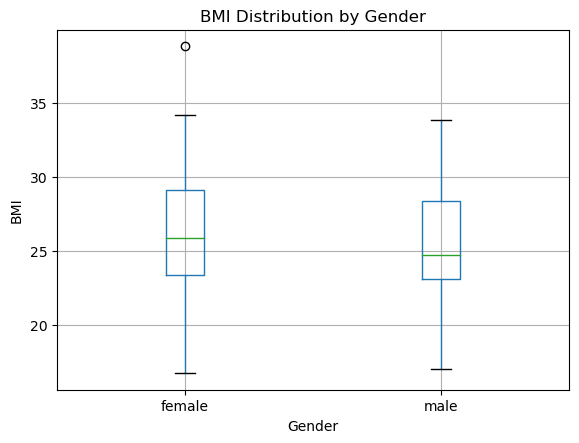

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming you have a DataFrame 'data' with 'gender' and 'bmi' columns

# Create a box plot
plt.figure(figsize=(8, 6))  # Set the figure size
boxplot = data.boxplot(column='bmi', by='gender')
plt.title('BMI Distribution by Gender')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Gender')
plt.ylabel('BMI')

# Show the plot
plt.show()


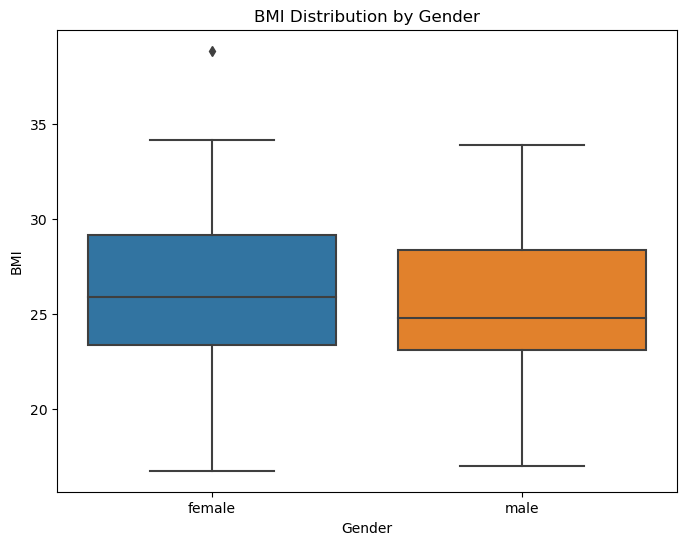

In [19]:
import seaborn as sns

# Create a box plot with Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='bmi', data=data)
plt.title('BMI Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')

# Show the plot
plt.show()


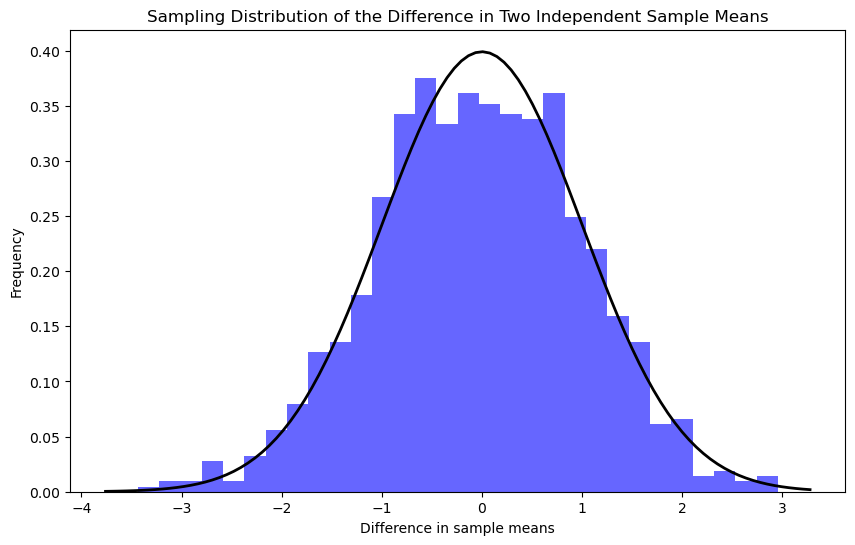

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the sampling distribution
# For demonstration, we assume the following:
# The difference in population means is 0 under the null hypothesis
mu_diff = 0
# Standard deviation of the sampling distribution, assumed to be 1 for this example
sigma_diff = 1
# Sample size for illustration
sample_size = 1000

# Generate a sampling distribution of the difference in means
sample_diff_means = np.random.normal(mu_diff, sigma_diff, sample_size)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(sample_diff_means, bins=30, density=True, alpha=0.6, color='b')

# Plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_diff, sigma_diff)
plt.plot(x, p, 'k', linewidth=2)

title = "Sampling Distribution of the Difference in Two Independent Sample Means"
plt.title(title)
plt.xlabel('Difference in sample means')
plt.ylabel('Frequency')
plt.show()


The graph above illustrates the sampling distribution of the difference in two independent sample means. It shows a normal distribution centered around zero, which is what we'd expect under the null hypothesis that there is no difference between the two population means ($\mu_1 - \mu_2 = 0$).

The histogram represents the frequency of various differences observed in the sample means, while the black curve is the probability density function of a normal distribution with the mean ($\mu_{diff}$) set to 0 and a standard deviation ($\sigma_{diff}$) assumed to be 1 for this example. This visual representation helps us understand the variability we might expect by chance when estimating the difference between two means from independent samples.

In the context of a real-world application, such as comparing BMI between genders, you would calculate the actual standard deviation of the sampling distribution based on the sample data and the sample sizes of the groups being compared. This would then inform your hypothesis testing, allowing you to determine the likelihood of observing the sample mean difference if the null hypothesis were true.

The image you've uploaded depicts a concept from inferential statistics known as the "Sampling Distribution of the Difference in Two (Independent) Sample Means". This concept is pivotal when comparing the means from two independent groups to determine if there is a statistically significant difference between them.

The key points outlined in the image are:

1. If both populations of responses have distributions that are approximately normal, or if the sample sizes are large enough, then the distribution of the difference in sample means is also approximately normal.
2. The center of this sampling distribution is at the difference in population means $\mu_1 - \mu_2$.
3. The distribution allows for the calculation of the probability of observing a sample mean difference as extreme as, or more extreme than, the one observed.

In the context of the previous discussion about BMI across genders, the sampling distribution would be used to estimate the likelihood of observing the difference in mean BMIs between males and females under the null hypothesis that there is no true difference in the population means.

Calculation of the standard error for the sampling distribution of the difference between two independent sample means. The standard error is a measure of the variability of the sampling distribution and is crucial when conducting hypothesis tests or constructing confidence intervals.

The standard error formula for the difference between two independent means is provided in the image as:

$SE = \sqrt{\frac{{\sigma_1}^2}{n_1} + \frac{{\sigma_2}^2}{n_2}}$

Where:
- $\sigma_1^2$ and $\sigma_2^2$ are the population variances of the first and second groups, respectively.
- $n_1$ and $n_2$ are the sample sizes of the first and second groups, respectively.

Since population variances are rarely known, we use sample variances $s_1^2$ and $s_2^2$ to estimate the standard error:

$Estimated\:SE = \sqrt{\frac{{s_1}^2}{n_1} + \frac{{s_2}^2}{n_2}}$

This estimated standard error is used to calculate test statistics like the t-statistic in an independent samples t-test, or to construct confidence intervals for the difference between the two means.

Would you like to see how to calculate this estimated standard error using Python, given sample data?

In [21]:
import scipy.stats as stats
import numpy as np

# Given values
sample_mean = 100  # The sample mean (x̄)
pop_std = 15       # Population standard deviation (σ)
n = 50             # Sample size (n)
confidence_level = 0.95  # Confidence level

# Calculate the z-score for the given confidence level
z_score = stats.norm.ppf((1 + confidence_level) / 2)

# Calculate the standard error of the mean (SEM)
sem = pop_std / np.sqrt(n)

# Calculate the margin of error (MOE)
moe = z_score * sem

# Calculate the confidence interval
ci_lower = sample_mean - moe
ci_upper = sample_mean + moe

(ci_lower, ci_upper)


(95.84228852695097, 104.15771147304903)

There are two different approaches to constructing confidence intervals when dealing with two populations:

1. **Pooled Approach**: This method assumes that the variances of the two populations are equal. Mathematically, this is denoted as $ \sigma_1^2 = \sigma_2^2 $, where $ \sigma_1^2 $ and $ \sigma_2^2 $ represent the population variances of the first and second populations, respectively.

2. **Unpooled Approach**: This method does not assume that the variances of the two populations are equal. It is used when the assumption of equal variances (homogeneity of variance) is not tenable.

When calculating a confidence interval for the difference between two means, the choice between a pooled and unpooled approach depends on the results of a test for equal variances (such as Levene's test or an F-test). If the test suggests that the variances are equal, a pooled approach is typically used, which leads to a simpler formula and a more precise confidence interval. If the variances are not equal, the unpooled approach is used, which adjusts the degrees of freedom and the standard error to account for the difference in variance.



**Pooled approach**

Pooled confidence intervals are appropriate when the two populations are assumed to have equal variances.

The formula presented is:

$$
(\bar{x}_1 - \bar{x}_2) \pm t^* \cdot \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2} \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}
$$

In this formula:

- $\bar{x}_1$ and $\bar{x}_2$ are the sample means.
- $s_1^2$ and $s_2^2$ are the sample variances.
- $n_1$ and $n_2$ are the sample sizes.
- $t^*$ is the t-score from the t-distribution that corresponds to the desired confidence level.
- $n_1 + n_2 - 2$ gives the degrees of freedom for the t-distribution.

This approach assumes that the population variances are equal, which is why the variances are pooled together in the calculation.



To interpret the results of the 95% confidence interval calculation for the difference in mean BMI between male and female Mexican-American adults, we use the final image you've uploaded which contains the summary statistics and the formula for the confidence interval.

Here are the summary statistics given:

- Mean BMI for males: 23.57
- Mean BMI for females: 22.83
- Standard deviation for males: 6.24
- Standard deviation for females: 6.43
- Sample size for males: 258
- Sample size for females: 239

The formula for the 95% confidence interval using the pooled variance approach is:

$$
(23.57 - 22.83) \pm 1.98 \cdot \sqrt{\frac{(258-1) \cdot 6.24^2 + (239-1) \cdot 6.43^2}{258+239-2} \left( \frac{1}{258} + \frac{1}{239} \right)}
$$

The $t^* $ value of 1.98 is the t-score corresponding to a 95% confidence interval for the given degrees of freedom (which would be $ 258+239-2 $ in this case).

Let's calculate the exact values for the confidence interval.

The difference in the mean BMI between male and female Mexican-American adults is approximately 0.74. The 95% confidence interval for this difference ranges from approximately -0.38 to 1.86. This interval means we are 95% confident that the true difference in mean BMIs between the two populations lies within this range.

Since the confidence interval includes zero, it suggests that there may not be a statistically significant difference in the mean BMI between male and female Mexican-American adults. If the interval had not included zero, it would indicate a significant difference.

However, it's important to note that while the confidence interval provides valuable information about the difference in means and its uncertainty, it does not test a specific hypothesis about the means being equal or not. For that, a hypothesis test such as an independent samples t-test would be more appropriate. Additionally, the fact that the confidence interval is not symmetric around the observed difference in means is a consequence of the sample sizes and variances from each group contributing differently to the pooled standard error.

In [24]:
import scipy.stats as stats
import numpy as np

# Given values
average_weight_male = 23.57
average_weight_female = 22.83
standard_deviation_male = 6.24
standard_deviation_female = 6.43
sample_size_male = 258
sample_size_female = 239

# Calculate the pooled standard deviation
pooled_variance = (((sample_size_male - 1) * standard_deviation_male ** 2) + 
                   ((sample_size_female - 1) * standard_deviation_female ** 2)) / (sample_size_male + sample_size_female - 2)
pooled_standard_deviation = np.sqrt(pooled_variance)

# Calculate the standard error
standard_error = np.sqrt(pooled_variance * (1/sample_size_male + 1/sample_size_female))

# Degrees of freedom for the t-distribution
degrees_freedom = sample_size_male + sample_size_female - 2

# Calculate the t-score for a 95% confidence interval (two-tailed test)
t_score = stats.t.ppf(1 - 0.025, degrees_freedom)

# Calculate the margin of error
margin_of_error = t_score * standard_error

# Calculate the confidence interval
difference_in_means = average_weight_male - average_weight_female
confidence_interval_lower = difference_in_means - margin_of_error
confidence_interval_upper = difference_in_means + margin_of_error

# Output the results
print(f"Difference in Means: {difference_in_means:.2f}")
print(f"Margin of Error: {margin_of_error:.2f}")
print(f"95% Confidence Interval: ({confidence_interval_lower:.2f}, {confidence_interval_upper:.2f})")


Difference in Means: 0.74
Margin of Error: 1.12
95% Confidence Interval: (-0.38, 1.86)


**Unpooled approach**

The image you have uploaded appears to show a slide from a statistical presentation on how to calculate unpooled confidence intervals for the difference between two sample means. The formula provided is the standard formula for an unpooled (also known as Welch's) t-confidence interval, which is used when the two populations are assumed to have unequal variances.

The formula for the confidence interval is given by:

$$
(\bar{x}_1 - \bar{x}_2) \pm t^* \cdot \sqrt{\frac{{s_1}^2}{n_1} + \frac{{s_2}^2}{n_2}}
$$

Here, $\bar{x}_1$ and $\bar{x}_2$ are the sample means, $s_1^2$ and $s_2^2$ are the sample variances, $n_1$ and $n_2$ are the sample sizes, and $t^*$ is the t-score from the t-distribution that corresponds to the desired confidence level.

The degrees of freedom ($df$) for the $t^*$ multiplier can be found using Welch's approximation. If technology to calculate this is not available, the slide suggests a conservative approach can be taken by using the smaller of $n_1 - 1$ and $n_2 - 1$ (i.e., $df = \min(n_1 - 1, n_2 - 1)$).


For the unpooled approach, we modify the calculation of the standard error and the degrees of freedom. This approach is used when we cannot assume that the two populations have equal variances. The steps involved are:

1. **Calculate the Standard Error**: Unlike the pooled approach, the standard error in the unpooled approach is calculated separately for each group and then combined.

2. **Degrees of Freedom**: The Welch-Satterthwaite equation is used to approximate the degrees of freedom, as it accounts for the difference in variances and sample sizes of the two groups.

Here's the updated formula and Python code for the unpooled approach:

### Unpooled Standard Error Formula
The standard error for the difference in means is calculated as:
$$\text{Standard Error} = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}$$
where $ s_1 $ and $ s_2 $ are the standard deviations of the two groups, and $ n_1 $ and $ n_2 $ are the sample sizes.

### Degrees of Freedom Formula
The degrees of freedom are approximated using the Welch-Satterthwaite equation:
$$df = \frac{\left( \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} \right)^2}{\frac{(\frac{s_1^2}{n_1})^2}{n_1 - 1} + \frac{(\frac{s_2^2}{n_2})^2}{n_2 - 1}}$$


In [25]:
import scipy.stats as stats
import numpy as np

# Given values
average_weight_male = 23.57
average_weight_female = 22.83
standard_deviation_male = 6.24
standard_deviation_female = 6.43
sample_size_male = 258
sample_size_female = 239

# Calculate the standard error (unpooled)
se_male = standard_deviation_male ** 2 / sample_size_male
se_female = standard_deviation_female ** 2 / sample_size_female
standard_error_unpooled = np.sqrt(se_male + se_female)

# Degrees of freedom (Welch-Satterthwaite equation)
df_unpooled = ((se_male + se_female) ** 2) / \
              ((se_male ** 2 / (sample_size_male - 1)) + (se_female ** 2 / (sample_size_female - 1)))

# Calculate the t-score for a 95% confidence interval (two-tailed test)
t_score_unpooled = stats.t.ppf(1 - 0.025, df_unpooled)

# Calculate the margin of error
margin_of_error_unpooled = t_score_unpooled * standard_error_unpooled

# Calculate the confidence interval
confidence_interval_lower_unpooled = difference_in_means - margin_of_error_unpooled
confidence_interval_upper_unpooled = difference_in_means + margin_of_error_unpooled

# Output the results
print(f"Difference in Means: {difference_in_means:.2f}")
print(f"Margin of Error (Unpooled): {margin_of_error_unpooled:.2f}")
print(f"95% Confidence Interval (Unpooled): ({confidence_interval_lower_unpooled:.2f}, {confidence_interval_upper_unpooled:.2f})")

Difference in Means: 0.74
Margin of Error (Unpooled): 1.12
95% Confidence Interval (Unpooled): (-0.38, 1.86)


The results from the Python code can be interpreted as follows:

1. **Difference in Means**: The calculated difference in means between the two groups (males and females, in this context) is 0.74. This suggests that, on average, the characteristic being measured (possibly weight, given the context) for males is 0.74 units higher than that for females.

2. **Margin of Error (Unpooled)**: The margin of error, calculated using the unpooled approach, is 1.12. This value provides an indication of the uncertainty associated with the difference in means. The larger the margin of error, the greater the uncertainty.

3. **95% Confidence Interval (Unpooled)**: The 95% confidence interval, ranging from -0.38 to 1.86, gives a range of values within which we can be 95% confident that the true difference in means lies. Since this interval includes both negative and positive values, it indicates that the data does not provide strong evidence for a definitive difference in the means of the two groups. In other words, while the average measure for males might be higher than for females, the statistical evidence is not strong enough to conclusively support this claim at the 95% confidence level.

    - The inclusion of zero in this interval suggests that there's a significant possibility that there might be no real difference in the characteristic being measured between the two groups.

In summary, while the observed data shows a mean difference of 0.74 in favor of males, the statistical uncertainty (as shown by the margin of error and the confidence interval) is too high to conclusively state that this difference is significant. This is a common scenario in statistical analysis, where the observed effect (difference in means) is not sufficiently supported by the data to draw a firm conclusion, especially in the presence of variability (as indicated by the wide confidence interval). 

With 95% confidence, the difference in mean body mass index between males and females for all Mexican-American adults (ages 18 - 29) in the
U.S. is estimated to be between -0.385 kg/m2 and 1.865 kg/m2.

The text provides a comprehensive overview of confidence intervals (CIs), their construction, and considerations affecting their performance. Here's a summarized version:

1. **Definition and Purpose of Confidence Intervals (CIs)**: A CI is an interval (a, b) constructed from data to cover an unknown population parameter with high probability. For instance, a CI around an estimated mean BMI might cover the true mean with a set probability (e.g., 95%).

2. **Construction and Coverage Probability**: CIs are defined by their lower and upper confidence bounds (LCB, UCB). The coverage probability (typically 95%) reflects the likelihood that the CI will cover the true parameter value, θ, across repeated sampling.

3. **Width of the Interval**: The width of the CI is a balance between coverage probability and informativeness. Wider intervals have a higher chance of covering the target but are less informative.

4. **Actual vs. Nominal Coverage Probability**: In practice, a CI's actual coverage probability may differ from the intended (nominal) level, being either conservative (overestimate) or anti-conservative (underestimate). 

5. **One Sample, One CI**: It's critical to understand that for any given sample, the derived CI either covers or fails to cover the target value, and this fact is binary, not probabilistic.

6. **Verification Challenges**: Verifying that a CI achieves its intended coverage probability in practice is difficult, often relying on theoretical properties and computer simulations.

7. **CI Construction Elements**: CIs generally use an unbiased estimate of a population parameter and the standard error of this estimate. They often take the form "point estimate ± K standard errors," where K is determined to achieve the desired coverage level.

8. **Methods to Determine K**:
   - **Normal Distribution Assumption**: Assumes data are normally distributed, using the Student-t distribution for K.
   - **Central Limit Theorem (CLT)**: Applies when data are not normally distributed but are sufficiently large in sample size. 

9. **Sample Size and Normality**: The applicability of normality assumptions and the CLT depends on the sample size and the distribution of the data.

10. **Alternative Approaches for Challenging Data**:
    - **Agresti-Coull Interval**: Adjusts sample proportions for small sample sizes.
    - **Transformation Techniques**: Applies transformations to skewed data to improve CI performance.

11. **Conclusion**: Normality is not always crucial for CI performance, except in cases of small sample sizes or extreme non-normality. Other factors like data clustering or multiplicity can more significantly affect CI coverage probabilities.

This summary encapsulates the key points about confidence intervals, their interpretation, and factors influencing their accuracy and reliability.

The standard error of an estimate is crucial in gauging the precision of statistical estimates, which in turn impacts the quality of inferences made about a population parameter. The uploaded figure illustrates the effects of sample size and cluster size on the standard error of an estimate for a population mean. Here’s a summary based on the provided text and the figure:

1. **Variance of Variables**: Higher variability in the data leads to higher standard errors, emphasizing the need for precise measurement in studies.

2. **Sample Size**: Larger sample sizes reduce standard errors, yielding more precise estimates. However, large data sets do not inherently ensure precision, especially if they include significant outliers.

3. **Dependence in Observations**: Cluster sampling, where observations within clusters are not independent, can inflate standard errors because the effective sample size is smaller than it appears. This is evident in the larger spread of sampling distributions with larger cluster sizes, as shown in the figure.

4. **Stratification**: Stratifying the sample can increase the precision of estimates by reducing variability due to differences between strata.

5. **Sampling Weights**: While necessary for unbiased estimates, the use of sampling weights can increase the variance, particularly if there is high variability in the weights themselves.

The figure supports these points by showing that:
- As the sample size increases (from n = 500 to n = 5000), the sampling distributions become narrower, indicating lower standard errors.
- As the cluster size increases (from no clusters to clusters of size 50), the sampling distributions become wider, indicating higher standard errors.

In conclusion, to achieve more precise estimates with smaller standard errors, one must consider the variability of the data, ensure a sufficiently large and well-stratified sample, carefully manage the cluster effects, and appropriately use sampling weights.

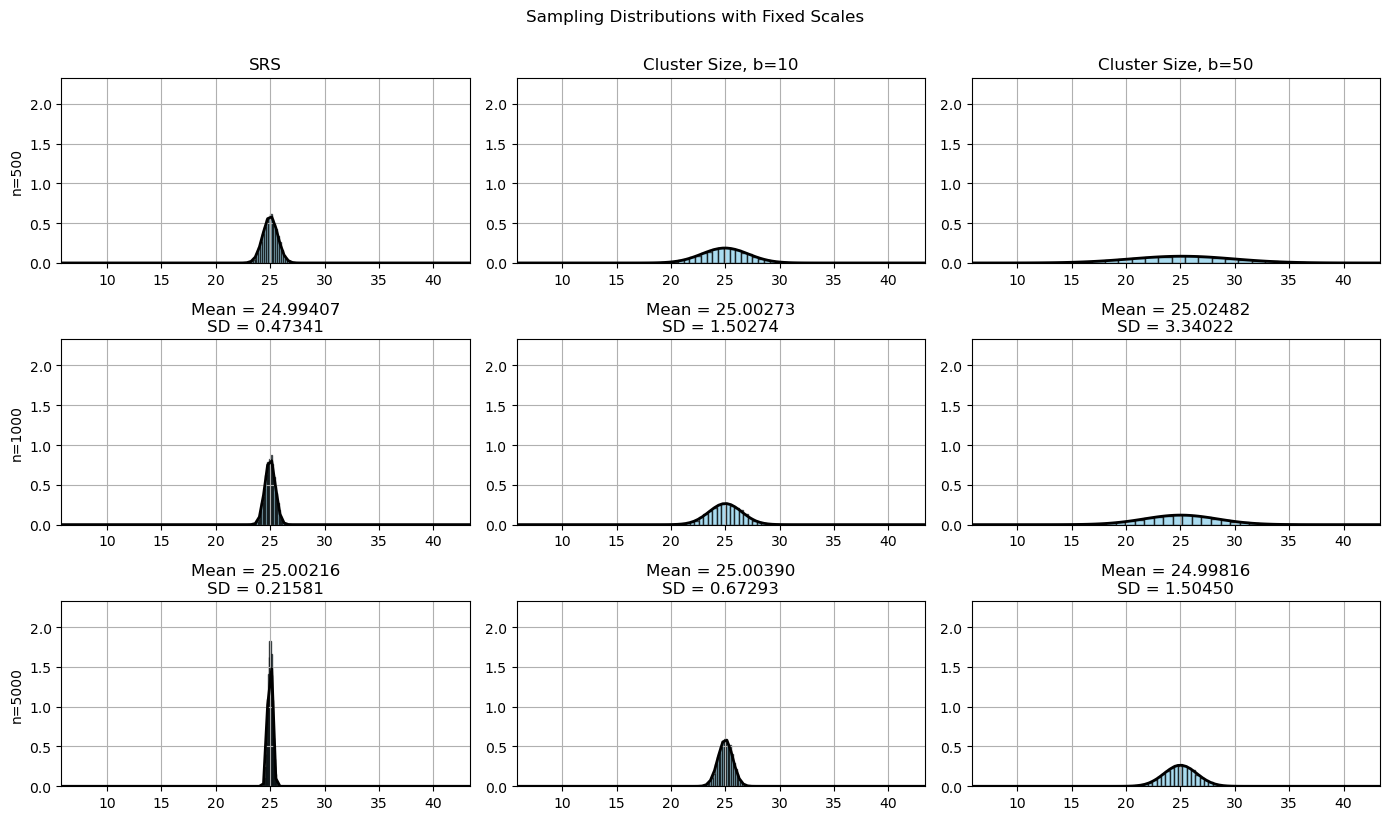

In [37]:
# Function to simulate sampling distributions and plot the results with fixed scales
def simulate_sampling_distributions_fixed_scales(n_samples, cluster_sizes, n_simulations=10000):
    # Setting a random seed for reproducibility
    np.random.seed(0)

    # Creating subplots
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 8))

    # Defining the true population mean and standard deviation
    population_mean = 25
    population_std = 15

    # Initial values for fixed axes scales
    y_max = 0  # Will store the maximum y-value to set the same scale for y-axis across all plots
    x_min = float('inf')  # Will store the minimum x-value for x-axis scale
    x_max = float('-inf')  # Will store the maximum x-value for x-axis scale

    # First pass to find common scales
    for n in n_samples:
        for b in cluster_sizes:
            means = []
            for _ in range(n_simulations):
                if b == 1:  # Simple random sampling (SRS)
                    sample = np.random.normal(population_mean, population_std, n)
                else:  # Cluster sampling
                    clusters = np.random.normal(population_mean, population_std, n // b)
                    sample = np.repeat(clusters, b)
                    if len(sample) > n:  # Adjust if cluster sampling exceeds desired sample size
                        sample = sample[:n]

                means.append(np.mean(sample))

            means = np.array(means)
            count, bins = np.histogram(means, bins=30)
            y_max = max(y_max, count.max())  # Update y_max if needed
            x_min = min(x_min, bins.min())  # Update x_min if needed
            x_max = max(x_max, bins.max())  # Update x_max if needed

    # Use the found y_max to set y-axis limit, and (x_min, x_max) for x-axis limit
    y_max = y_max / n_simulations * 20.5  # Convert count to density and add some padding
    x_range = (x_min, x_max)

    # Second pass to plot with fixed scales
    for i, n in enumerate(n_samples):
        for j, b in enumerate(cluster_sizes):
            means = []
            for _ in range(n_simulations):
                if b == 1:  # Simple random sampling (SRS)
                    sample = np.random.normal(population_mean, population_std, n)
                else:  # Cluster sampling
                    clusters = np.random.normal(population_mean, population_std, n // b)
                    sample = np.repeat(clusters, b)
                    if len(sample) > n:  # Adjust if cluster sampling exceeds desired sample size
                        sample = sample[:n]

                means.append(np.mean(sample))

            means = np.array(means)
            mean_of_means = np.mean(means)
            std_of_means = np.std(means)

            # Plotting the sampling distribution with fixed scales
            ax = axes[i, j]
            ax.hist(means, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7)
            # Overlaying the normal distribution
            x = np.linspace(x_range[0], x_range[1], 100)
            p = norm.pdf(x, mean_of_means, std_of_means)
            ax.plot(x, p, 'k', linewidth=2)
            title = f"Mean = {mean_of_means:.5f}\nSD = {std_of_means:.5f}"
            ax.set_title(title)
            ax.grid(True)
            ax.set_ylim(0, y_max)
            ax.set_xlim(x_range)

            # Only show y-axis labels for the leftmost plots
            if j == 0:
                ax.set_ylabel(f"n={n}")

    # Adjust layout
    plt.tight_layout()
    plt.suptitle('Sampling Distributions with Fixed Scales', y=1.02)

    # Column titles
    for ax, column_title in zip(axes[0], ['SRS', 'Cluster Size, b=10', 'Cluster Size, b=50']):
        ax.set_title(column_title)

    # Save the figure
    plt.savefig('sampling_distributions_fixed_scales.png')

    return fig

# Generate the figure with fixed scales
fig_fixed_scales = simulate_sampling_distributions_fixed_scales(n_samples, cluster_sizes)




# End